In [1]:
import pandas as pd
from pathlib import Path

In [2]:
def read_fasta(filename):
    sequences = []
    path = Path(filename)
    with open(path, "r") as fasta_file:
        sequence = {}
        accession = None
        for line in fasta_file:
            if '>' in line:
                if sequence and accession:
                    sequences.append({
                        "accession": accession,
                        "sgene_nucleotide": "".join(sequence)
                    })

                parts = line.split(" ")
                accession = parts[0][1:].strip()
                sequence = []
            else:
                sequence.append(line.strip())
    
    df = pd.DataFrame.from_dict(sequences)
#     df.to_csv(path.with_suffix(".csv"), index=False)
    return df

df = read_fasta("good_unique2.aln")


In [3]:
# df['indexes'] = df["sgene_nucleotide"].str.find("-")

def convert(s):
    return pd.Series(list(s))

_df = df["sgene_nucleotide"].apply(convert)
# _df = _df.rename(columns=lambda x: "pos_" + str(x))


In [4]:
df = pd.concat([df, _df], axis=1)

In [5]:
_df

,0,1,2,3,4,5,6,7,8,9,...,3863,3864,3865,3866,3867,3868,3869,3870,3871,3872
0,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
1,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
2,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
3,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
4,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
4379,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
4380,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A
4381,-,-,-,-,-,-,-,-,-,-,...,T,T,A,C,A,C,A,T,A,A


In [6]:
frequencies = _df.apply(pd.value_counts)

In [7]:
frequencies = frequencies.T

In [8]:
frequencies

,-,A,C,G,T
0,4379.0,4.0,NaN,NaN,NaN
1,4379.0,NaN,NaN,NaN,4.0
2,4379.0,NaN,NaN,4.0,NaN
3,4379.0,NaN,NaN,NaN,4.0
4,4379.0,NaN,NaN,NaN,4.0
...,...,...,...,...,...
3868,NaN,NaN,4383.0,NaN,NaN
3869,NaN,4382.0,1.0,NaN,NaN
3870,NaN,NaN,NaN,NaN,4383.0
3871,NaN,4383.0,NaN,NaN,NaN


In [9]:
f = frequencies[frequencies['-']>0]

In [10]:
f

,-,A,C,G,T
0,4379.0,4.0,NaN,NaN,NaN
1,4379.0,NaN,NaN,NaN,4.0
2,4379.0,NaN,NaN,4.0,NaN
3,4379.0,NaN,NaN,NaN,4.0
4,4379.0,NaN,NaN,NaN,4.0
...,...,...,...,...,...
3806,1.0,1.0,4376.0,NaN,5.0
3807,1.0,NaN,NaN,NaN,4382.0
3808,1.0,NaN,NaN,4382.0,NaN
3809,1.0,NaN,4380.0,NaN,2.0


In [11]:
f.to_csv("frequences.csv")

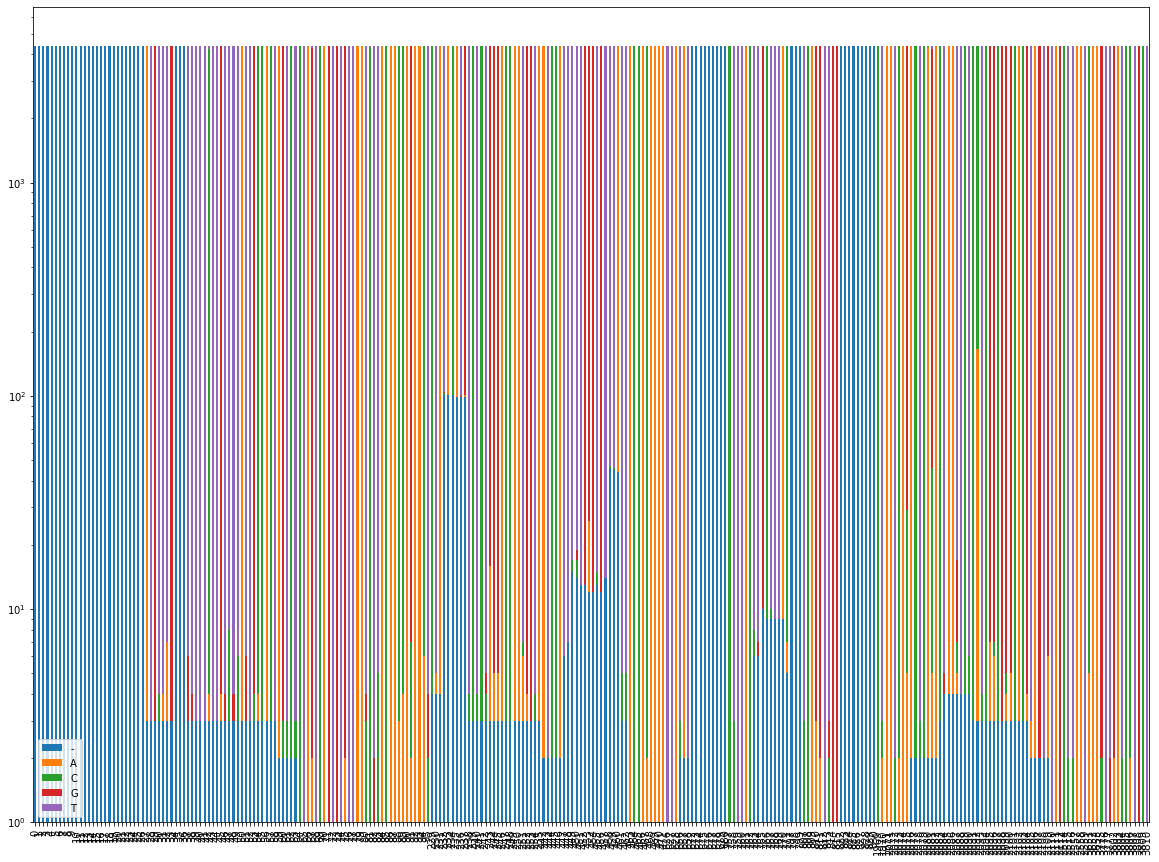

In [12]:
# f.plot(figsize=(20,15))
ax = f.plot.bar(stacked=True, figsize=(20,15))
ax.set_yscale('log')